Importing necessary libraries:

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.read_ is used for loading the data into the code.
<br/>
use pd.read_csv() to load the data and store it into the 'df' variable:

In [87]:
df = pd.read_csv('sample.csv')


use df.head(n) to see a few rows of your data:

In [88]:
df.head(7)

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3
5,6,Exercise 1,479.722690,78.887578,80.596592,60,Female,41,169,34.719336,Rainy,10
6,7,Exercise 9,457.631361,65.681125,61.815386,18,Male,53,103,34.594641,Cloudy,10


The KDE plot is a technique that allows for non-parametric estimation of the probability density function of a random variable. Its primary use is to visually represent the distribution of a dataset, as well as to evaluate the assumptions made by parametric models and to uncover patterns and trends in the data.


You can plot a column of the dataframe using the following command in seaborn:
```
sns.kdeplot(df['column1'])
plt.show()
```
or mutiple columns using:
```
sns.kdeplot(df[['column1', 'column2', 'column3']])
```

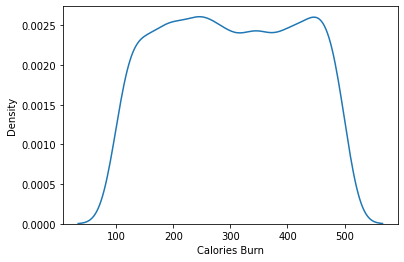

In [89]:
# Draw kdeplot for the 'Calories Burn' column: 

sns.kdeplot(df['Calories Burn'])
plt.show()

A histogram is a statistical graph that represents the distribution of a continuous dataset through plotted bars, each representing a particular category or class interval. The bar height reflects the frequency or count of data points within each group.
search about:
* how to use histplot in seaborn and matplotlib,
* what is the usuage of the 'bins' parameter,
* plot and compare the following columns:

1. Dream Weight VS Actual Weight

Do you see any limits?

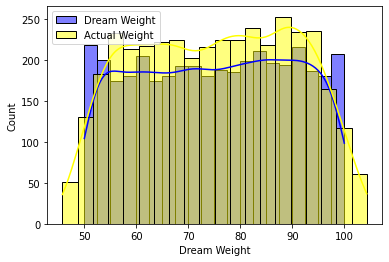

In [90]:
sns.histplot(df['Dream Weight'], color='blue', kde=True, label='Dream Weight', bins=20)
sns.histplot(df['Actual Weight'], color='yellow', kde=True, label='Actual Weight', bins=20)
plt.legend()
plt.show()


There is a method for dataframes in pandas called .corr
<br/>
This method calculates the correlation matrix for all columns.
<br/>
search about different values for 'method' parameter in df.corr and use them.

In [91]:
# Method 1: Pearson correlation (default)
pearson_corr = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
print("Pearson Correlation:")
pearson_corr.head(10)

# #Method 2: Spearman correlation
# spearman_corr = df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')
# print("Spearman Correlation:")
# spearman_corr.head(10)

# #Method 3: Kendall correlation
# kendall_corr = df.select_dtypes(include=['float64', 'int64']).corr(method='kendall')
# print("\nKendall Correlation:")
# print(kendall_corr) or kendall_corr.head(10)

Pearson Correlation:


,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
ID,1.000000,-0.017108,-0.001532,-0.001108,0.009428,0.032130,0.007062,0.003625,-0.004103
Calories Burn,-0.017108,1.000000,0.012749,0.010444,-0.001113,0.021793,-0.035889,0.012602,0.010819
Dream Weight,-0.001532,0.012749,1.000000,0.981377,0.006689,0.016116,-0.001855,0.002237,0.000087
Actual Weight,-0.001108,0.010444,0.981377,1.000000,0.003368,0.020490,-0.002543,-0.003703,-0.002670
Age,0.009428,-0.001113,0.006689,0.003368,1.000000,-0.006567,-0.008939,-0.002915,0.005565
Duration,0.032130,0.021793,0.016116,0.020490,-0.006567,1.000000,0.014941,0.020203,0.023195
Heart Rate,0.007062,-0.035889,-0.001855,-0.002543,-0.008939,0.014941,1.000000,0.015555,-0.004510
BMI,0.003625,0.012602,0.002237,-0.003703,-0.002915,0.020203,0.015555,1.000000,-0.020881
Exercise Intensity,-0.004103,0.010819,0.000087,-0.002670,0.005565,0.023195,-0.004510,-0.020881,1.000000


Oops!
<br/>
As you can see we can not use correlation matrix for categorical columns.
<br/>
We can use it just for numerical columns.
<br/>
df.drop() is used for removing a column/row from the dataframe.
<br/>
search about:
* What is axis parameter,
* How to drop multiple columns from the dataframe,
* What is inplace parameter.
<br/>

try again 

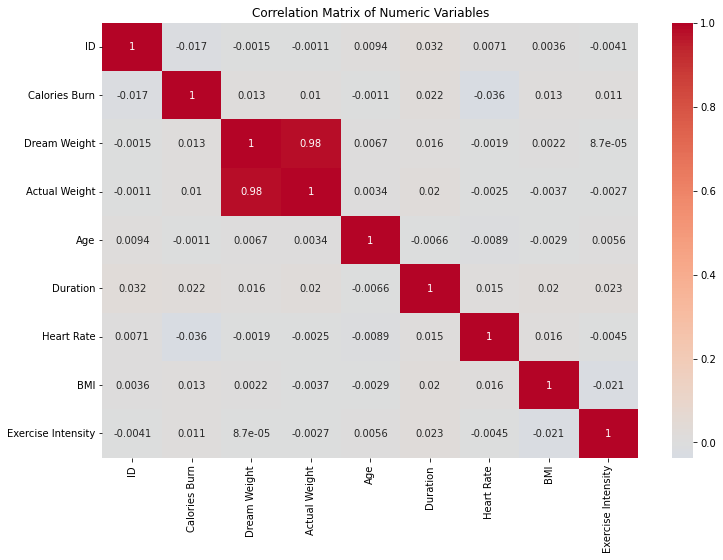

In [92]:
# Drop categorical columns for correlation analysis
df.drop(['Exercise', 'Gender', 'Weather Conditions'], axis=1, inplace=True)
numeric_corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


### Thanks!